In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 6  1  3  0]
  [ 4 -1 -1  2]
  [ 5  3 -1  2]
  [-1  4 -1  2]
  [ 7  2 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [13  8 10  0]
  [11 -1 -1  9]
  [12 10 -1  9]
  [-1 11 -1  9]
  [14  9 -1  0]
  [-1 13 -1  0]]]


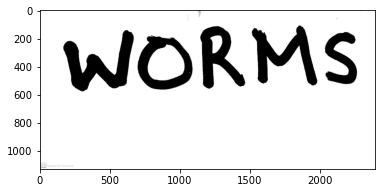

In [44]:
image = cv2.imread('worms.jpg')
im = image.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(im, cmap='gray')
print(hierarchy)

(2705352,)

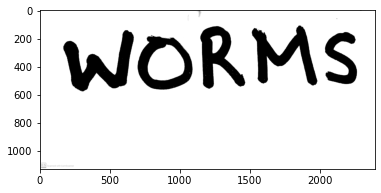

In [45]:
plt.imshow(imgray, cmap='gray')
imgray = imgray.flatten()
imgray.shape

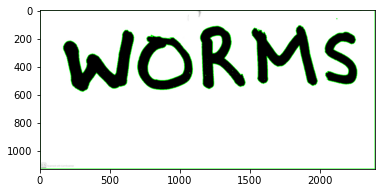

In [46]:
with_contours = cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im, cmap='gray')

In [47]:
# NEW
new_images = []
order = []
for hr,c in zip(hierarchy[0],contours):
  x, y, w, h = cv2.boundingRect(c)
    # Make sure contour area is large enough
  if hr[3]==0 and (cv2.contourArea(c)) > 100: #Used to be 9000, now 100
    order.append(x)
    cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
    alpha_im = image[y:(y+h),x:(x+w)]
    alpha_im = cv2.cvtColor(alpha_im, cv2.COLOR_BGR2GRAY)
    alpha_im = cv2.bitwise_not(alpha_im)
    alpha_im = cv2.copyMakeBorder(alpha_im,100,100,100,100,cv2.BORDER_CONSTANT)
    alpha_im = cv2.resize(alpha_im, (28,28)).flatten()
    
    new_images.append(alpha_im)

temp = []
order = np.argsort(order)
for i in order:
    temp.append(new_images[i])
new_images = np.array(temp)
new_images.shape

(5, 784)

In [48]:
# OLD
# new_images = []
# for c in contours:
#   x, y, w, h = cv2.boundingRect(c)
 
#     # Make sure contour area is large enough
#   if (cv2.contourArea(c)) > 9000:
#     cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
#     alpha_im = image[y:(y+h),x:(x+w)]
#     alpha_im = cv2.cvtColor(alpha_im, cv2.COLOR_BGR2GRAY)
#     alpha_im = cv2.bitwise_not(alpha_im)
#     alpha_im = cv2.copyMakeBorder(alpha_im,100,100,100,100,cv2.BORDER_CONSTANT)
#     alpha_im = cv2.resize(alpha_im, (28,28)).flatten()
    
#     print(alpha_im.shape)
#     new_images.append(alpha_im)

# new_images = np.array(new_images[1:])
# new_images.shape

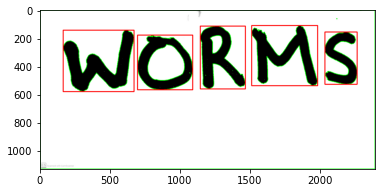

In [49]:
plt.imshow(with_contours)

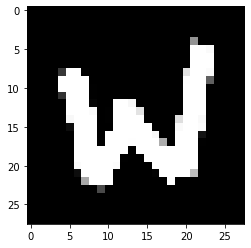

In [50]:
plt.imshow(new_images[0].reshape(28,28), cmap='gray')

In [51]:
A_Z = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
model = load_model("alpha_pred.h5")

In [52]:
# scaler = StandardScaler()
# new_images = scaler.fit_transform(new_images)

In [53]:
from joblib import load
scaler=load('std_scaler.bin')
new_images = scaler.transform(new_images)

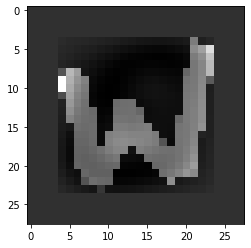

In [54]:
plt.imshow(new_images[0].reshape(28,28), cmap='gray')

In [55]:
new_images.shape

(5, 784)

In [56]:
predictions = [ np.argmax(np.array(list(map(int,pred == max(pred))))) for pred in model.predict(new_images)]
predictions = [A_Z[p] for p in predictions]
predictions

['W', 'O', 'R', 'M', 'S']

In [57]:
predicted_word = "".join(predictions)
predicted_word = predicted_word.lower()
predicted_word

'worms'

In [67]:
## Using Alternative library with less words

# from english_words import english_words_set
# import difflib

# if(predicted_word in (english_words_set)):
#     print(f"Recognised word: {predicted_word}")
# else:
#     close_matches = difflib.get_close_matches(predicted_word, english_words_set)
#     print(f"Sorry we are unable to recognise your word,\nDid you mean any of these:  {close_matches}")
# len(english_words_set)

Sorry we are unable to recognise your word,
Did you mean any of these:  ['worm', 'worst', 'worse']


25487

In [68]:
from nltk.corpus import words
word_list = words.words()
import difflib

if(predicted_word in (word_list)):
    print(f"Recognised word: {predicted_word}")
else:
    close_matches = difflib.get_close_matches(predicted_word, english_words_set)
    print(f"Sorry we are unable to recognise your word,\nDid you mean any of these:  {close_matches}")
len(word_list)

Sorry we are unable to recognise your word,
Did you mean any of these:  ['worm', 'worst', 'worse']


236736

In [64]:
# import nltk
# nltk.download('words')

[nltk_data] Downloading package words to C:\Users\DR.ADDAE-
[nltk_data]     KORANKYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [ ]:
# pip install cdifflib

In [ ]:
# pip install english-words